https://github.com/dribbleanalytics/draft-class-shooters-ml/blob/master/master-draft-class-shooters-ml.ipynb

In [1]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter

In [64]:
# read CSV of single game data and prediction data

data = pd.read_csv('anderson game log.csv', header=0)
predictdata = pd.read_csv('anderson game log predict two.csv', header=0)

In [36]:
# review single game data

data.head

<bound method NDFrame.head of            AGE  FG  FGA  THREEP  THREEPA  FT  FTA  ORB  DRB  TRB  AST  STL  \
0    21.115068   1    8       0        2   2    3    0    8    8    4    2   
1    21.126027   0    0       0        0   0    0    0    0    0    0    0   
2    21.128767   0    2       0        0   0    0    0    1    1    0    0   
3    21.136986   0    4       0        2   0    0    0    3    3    1    0   
4    21.145205   1    7       0        1   0    0    0    3    3    0    0   
5    21.156164   0    2       0        0   0    0    0    2    2    1    0   
6    21.158904   0    0       0        0   0    0    0    0    0    1    0   
7    21.180822   0    1       0        0   0    0    0    1    1    0    1   
8    21.183562   0    0       0        0   0    0    0    0    0    0    0   
9    21.197260   1    3       0        0   1    2    0    5    5    1    0   
10   21.208219   4    5       1        2   0    0    1    4    5    3    2   
11   21.213699   3    6       0   

In [43]:
# review predicted data

predictdata.head

<bound method NDFrame.head of      AGE  FG  FGA  THREEP  THREEPA  FT  FTA  ORB  DRB  TRB  AST  STL  BLK  \
0  25.00   3    6       0        1   1    2    1    2    3    2    1    0   
1  25.25   3    7       1        3   3    5    1    3    4    3    2    1   
2  25.50   4    9       1        3   5    6    2    5    6    4    2    1   

   TOV  PF  PTS  MP  
0    1   2    7  30  
1    2   3   12  32  
2    3   3   16  36  >

In [55]:
# Create the train and test set

train, test = train_test_split(data, test_size=0.2, random_state=99)
 
xtrain = train[['AGE', 'FGA', 'FT', 'FTA', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'TOV', 'PF', 'PTS', 'MP']]
ytrain = train[['PlusMinus']]
 
xtest = test[['AGE', 'FGA', 'FT', 'FTA', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'TOV', 'PF', 'PTS', 'MP']]
ytest = test[['PlusMinus']]

In [56]:
# Create a linear regression model and test its accuracy

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

     PlusMinus
26    4.144760
54  -24.128650
49   14.584421
124  -2.995410
182  -9.206477
3     9.580496
81   -1.283831
208  -1.886011
249  -0.585759
119  -5.627309
239  10.181156
194   1.657050
158  -3.938018
50    6.850500
171  -7.019827
66    0.636027
32   -6.007151
43    0.768108
240   3.649688
143  -3.162195
40   -3.645764
183   2.803310
10    6.126736
148 -12.722072
117   3.394924
36   -3.598659
235  -1.787507
136 -10.186097
132  -2.609812
157   4.865185
56    0.763432
247   2.663637
82   14.256399
209  -6.711384
133 -14.850151
164   4.247194
162  -3.109415
244  17.258905
236   8.909488
44    0.586418
6     4.020187
237   1.884039
110  -0.484185
61   -6.085126
138 -18.319694
51   -5.317691
254  -3.477023
144 -13.826725
220   1.027850
84    3.259216
2    -1.251064
63   -4.064012
Coefficients: 
 [[-1.22617536 -1.72897832  0.6106063  -1.20078965  0.07591937  0.36367604
   0.4395954   1.27184175  1.09475441 -1.5073422   0.04248248  1.07580789
   0.12940239]]
Mean squared error: 62.14

In [57]:
# Let's try a ridge regression

ridgeReg = linear_model.Ridge(alpha = .1)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

     PlusMinus
26    4.143539
54  -24.127407
49   14.583263
124  -2.994684
182  -9.206897
3     9.580770
81   -1.284923
208  -1.886318
249  -0.585214
119  -5.628286
239  10.178744
194   1.656899
158  -3.936540
50    6.849772
171  -7.019190
66    0.636059
32   -6.007966
43    0.771854
240   3.656733
143  -3.160469
40   -3.646069
183   2.806263
10    6.121218
148 -12.724633
117   3.393145
36   -3.599036
235  -1.786057
136 -10.184829
132  -2.609922
157   4.865077
56    0.763551
247   2.665549
82   14.256595
209  -6.710647
133 -14.849640
164   4.247735
162  -3.108559
244  17.258293
236   8.907651
44    0.587833
6     4.018513
237   1.881857
110  -0.488265
61   -6.088171
138 -18.317143
51   -5.316370
254  -3.480905
144 -13.826664
220   1.029160
84    3.260607
2    -1.251705
63   -4.063199
Coefficients: 
 [[-1.22522405 -1.72840174  0.60832545 -1.19860643  0.07543492  0.36395902
   0.43939394  1.27150974  1.09412423 -1.50618373  0.04229969  1.07547493
   0.12932995]]
Mean squared error: 62.13

In [58]:
# Let's try a support vector regression instead

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_rbf = svr_rbf.predict(xtest)

print(y_rbf - ytest['PlusMinus'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rbf))
print('Variance score: %.3f' % r2_score(ytest, y_rbf))

26      3.292064
54    -20.276386
49     14.544093
124    -0.638338
182    -8.085919
3      10.593729
81     -0.501765
208    -2.190658
249    -1.564629
119    -6.203654
239    17.619357
194     3.005056
158    -0.639694
50      6.929933
171    -7.074290
66      0.545913
32     -4.348141
43      2.502284
240     6.887765
143     0.419998
40     -1.912998
183     5.448719
10      7.246095
148   -16.186842
117     0.386892
36     -3.852479
235     2.377949
136    -8.881807
132    -4.498476
157     2.944010
56      2.416227
247     3.773331
82     16.282969
209    -7.456892
133   -15.708865
164     3.366983
162    -1.230418
244    13.699476
236     7.045614
44     -0.267027
6       3.750280
237     0.987514
110     6.854398
61     -5.798614
138   -15.844487
51     -4.206219
254    -3.798855
144   -11.941588
220     1.690081
84      4.536372
2      -0.471453
63     -0.950327
Name: PlusMinus, dtype: float64
Mean squared error: 61.705
Variance score: 0.140


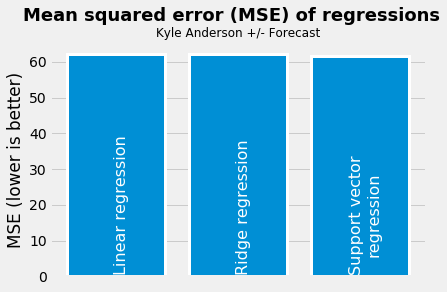

In [59]:
# Let's graph the mean squared error of all three models

msePlot, ax = plt.subplots()

mseScores = [mean_squared_error(ytest, y_predLin), mean_squared_error(ytest, y_predRidge), mean_squared_error(ytest, y_rbf)]
x_pos = np.arange(len(mseScores))

ax.bar(x_pos, mseScores, edgecolor = 'white', linewidth = 3)

mseNames = ["Linear regression", "Ridge regression", "Support vector\nregression"]

labels = [i for i in mseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

msePlot.suptitle("Mean squared error (MSE) of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("Kyle Anderson +/- Forecast", size = 12)
ax.xaxis.set_visible(False)
ax.set_ylabel("MSE (lower is better)")

msePlot.savefig('mse-plot.png', dpi = 400, bbox_inches = 'tight')

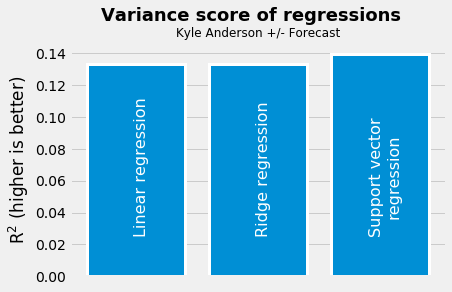

In [60]:
# Let's graph the variance score of all three models

r2plot, ax = plt.subplots()

r2scores = [r2_score(ytest, y_predLin), r2_score(ytest, y_predRidge), r2_score(ytest, y_rbf)]
x_pos = np.arange(len(r2scores))

ax.bar(x_pos, r2scores, edgecolor = 'white', linewidth = 3)

r2names = ["Linear regression", "Ridge regression", "Support vector\nregression"]

labels = [i for i in r2names]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .025
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white', size = 16)

r2plot.suptitle("Variance score of regressions", weight = 'bold', size = 18, y = 1.005)
ax.set_title("Kyle Anderson +/- Forecast", size = 12)
ax.xaxis.set_visible(False)
ax.set_ylabel(r"R$^{\rm 2}$ (higher is better)")

r2plot.savefig('r2-plot.png', dpi = 400, bbox_inches = 'tight')

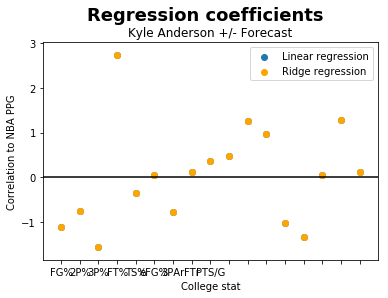

In [13]:
# Let's plot the coefficients

linearCoef = linReg.coef_
ridgeCoef = ridgeReg.coef_

linearCoefPlot = []
ridgeCoefPlot = []

for i in linearCoef[0]:
    linearCoefPlot.append(i)

for i in ridgeCoef[0]:
    ridgeCoefPlot.append(i)   

x_lin = np.arange(len(linearCoefPlot))
x_ridge = np.arange(len(ridgeCoefPlot))

coefPlot, ax = plt.subplots()

ax.scatter(x_lin, linearCoefPlot, label = "Linear regression")
ax.scatter(x_ridge, ridgeCoefPlot, color = 'orange', label = "Ridge regression")

ax.set_xticklabels(['FG%', '2P%', '3P%', 'FT%', 'TS%', 'eFG%', '3PAr', 'FTr', 'PTS/G'])
ax.set_xticks(x_lin)
ax.axhline(y = 0, color = 'black')

ax.set_ylabel("Correlation to NBA PPG")
ax.set_xlabel("College stat")
coefPlot.suptitle("Regression coefficients", weight = 'bold', size = 18, y = 1.005)
ax.set_title("Kyle Anderson +/- Forecast", size = 12)

ax.legend(loc = 'best')

coefPlot.savefig('coefficient-plot.png', dpi = 400, bbox_inches = 'tight')

In [61]:
predictdata.head

<bound method NDFrame.head of      AGE  FG  FGA  THREEP  THREEPA  FT  FTA  ORB  DRB  TRB  AST  STL  BLK  \
0  25.00   3    6       0        1   1    2    1    2    3    2    1    0   
1  25.25   3    7       1        3   3    5    1    3    4    3    2    1   
2  25.50   4    9       1        3   5    6    2    5    6    4    2    1   

   TOV  PF  PTS  MP  
0    1   2    7  30  
1    2   3   12  32  
2    3   3   16  36  >

In [65]:
# Let's see what the linear model predicts for this draft class

andersonprediction = predictdata.loc[:, 'AGE': 'MP']

linear_predict = linReg.predict(andersonprediction)

names = predictdata.loc[:, 'AGE']

for i, j in zip(linear_predict, names):
    print(i, j)

[-1.69901569] 25.0
[1.22715788] 25.25
[3.75088324] 25.5


In [70]:
# Let's see what the ridge regression predicts for this draft class

ridge_predict = ridgeReg.predict(andersonprediction)

for i, j in zip(ridge_predict, names):
    print(i, j)

[-1.69650533] 25.0
[1.23075599] 25.25
[3.75237737] 25.5


In [72]:
# Let's see what the support vector regression predicts for this draft class

svr_predict = svr_rbf.predict(andersonprediction)

for i, j in zip(svr_predict, names):
    print(i, j)

-1.8955272015252138 25.0
3.7990464506870105 25.25
3.543198189954886 25.5


[[25.5, 3.750883240530378], [25.25, 1.227157883149541], [25.0, -1.6990156900463589]]


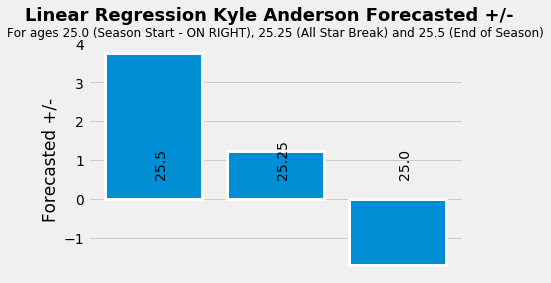

In [76]:
# Let's plot the linear regression predictions

plt.style.use('fivethirtyeight')
linRegPredictions, ax = plt.subplots()

linearPlot = []

for i in linear_predict:
    linearPlot.append(float(i))
    
combinedLinear = [[i, j] for i, j in zip(names, linearPlot)]

sortedLinear = sorted(combinedLinear, key = itemgetter(1), reverse = True)
print(sortedLinear)

sortedLinearData = [row[1] for row in sortedLinear]
x_pos = np.arange(len(sortedLinearData))

ax.bar(x_pos, sortedLinearData, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedLinear]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black')

linRegPredictions.suptitle("Linear Regression Kyle Anderson Forecasted +/-", weight = 'bold', size = 18, y = 1.005)
ax.set_title("For ages 25.0 (Season Start - ON RIGHT), 25.25 (All Star Break) and 25.5 (End of Season)", size = 12)
ax.xaxis.set_visible(False)
ax.set_ylabel("Forecasted +/-")

linRegPredictions.savefig('linear-regression-predictions.png', dpi = 400, bbox_inches = 'tight')

[[25.5, 3.7523773656931496], [25.25, 1.2307559863579165], [25.0, -1.6965053305973683]]


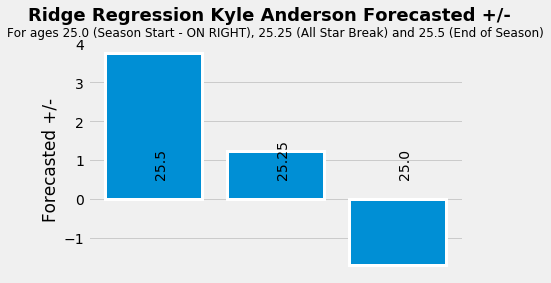

In [75]:
# Let's plot the ridge regression predictions

ridgeRegPredictions, ax = plt.subplots()

ridgePlot = []

for i in ridge_predict:
    ridgePlot.append(float(i))
    
combinedRidge = [[i, j] for i, j in zip(names, ridgePlot)]

sortedRidge = sorted(combinedRidge, key = itemgetter(1), reverse = True)
print(sortedRidge)

sortedRidgeData = [row[1] for row in sortedRidge]
x_pos = np.arange(len(sortedRidgeData))

ax.bar(x_pos, sortedRidgeData, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedRidge]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black')

ridgeRegPredictions.suptitle("Ridge Regression Kyle Anderson Forecasted +/-", weight = 'bold', size = 18, y = 1.005)
ax.set_title("For ages 25.0 (Season Start - ON RIGHT), 25.25 (All Star Break) and 25.5 (End of Season)", size = 12)
ax.xaxis.set_visible(False)
ax.set_ylabel("Forecasted +/-")

ridgeRegPredictions.savefig('ridge-regression-predictions.png', dpi = 400, bbox_inches = 'tight')

[[25.25, 3.7990464506870105], [25.5, 3.543198189954886], [25.0, -1.8955272015252138]]


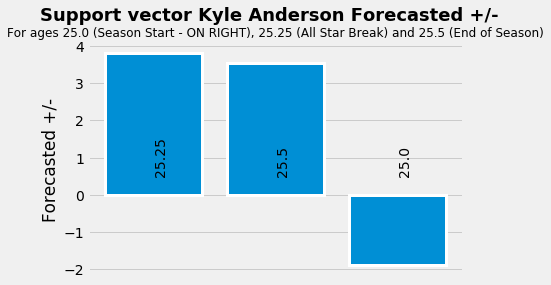

In [79]:
# Let's plot the support vector predictions

svrPredictions, ax = plt.subplots()

svrPlot = []

for i in svr_predict:
    svrPlot.append(float(i))
    
combinedSVR = [[i, j] for i, j in zip(names, svrPlot)]

sortedSVR = sorted(combinedSVR, key = itemgetter(1), reverse = True)
print(sortedSVR)

sortedSVRdata = [row[1] for row in sortedSVR]
x_pos = np.arange(len(sortedSVRdata))

ax.bar(x_pos, sortedSVRdata, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedSVR]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black')

svrPredictions.suptitle("Support vector Kyle Anderson Forecasted +/-", weight = 'bold', size = 18, y = 1.005)
ax.set_title("For ages 25.0 (Season Start - ON RIGHT), 25.25 (All Star Break) and 25.5 (End of Season)", size = 12)
ax.xaxis.set_visible(False)
ax.set_ylabel("Forecasted +/-")

svrPredictions.savefig('svr-predictions.png', dpi = 400, bbox_inches = 'tight')

[[25.5, 3.6821529320594713], [25.25, 2.0856534400648226], [25.0, -1.7636827407229803]]


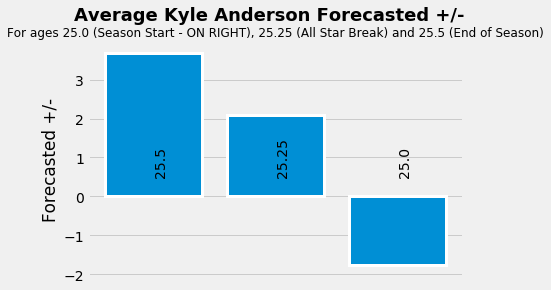

In [82]:
# Let's see what has the forecasted +/- is across the three models

avgPredictions, ax = plt.subplots()

averagePred = []

for i, j, h in zip(linear_predict, ridge_predict, svr_predict):
    averagePred.append(float((i + j + h) / 3))

combinedAvg = [[i, j] for i, j in zip(names, averagePred)]

sortedAvg = sorted(combinedAvg, key = itemgetter(1), reverse = True)
print(sortedAvg)

sortedAvgData = [row[1] for row in sortedAvg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, edgecolor = 'white', linewidth = 3)

labels = [row[0] for row in sortedAvg]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black')

avgPredictions.suptitle("Average Kyle Anderson Forecasted +/-", weight = 'bold', size = 18, y = 1.005)
ax.set_title("For ages 25.0 (Season Start - ON RIGHT), 25.25 (All Star Break) and 25.5 (End of Season)", size = 12)
ax.xaxis.set_visible(False)
ax.set_ylabel("Forecasted +/-")

avgPredictions.savefig('avg-predictions.png', dpi = 400, bbox_inches = 'tight')